# Part I - Flights Dataset Exploration
## by Thien Huynh

## Introduction
> "Airline On-Time Performance Data" is selected as it reports flights in the United States, including carriers, arrival and departure delays, and reasons for delays, from 1987 to 2008. 

## Preliminary Wrangling


In [1]:
# Import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
# Load datasets to dataframe
# Flights containing detail information of each flight 
flights_2007 = pd.read_csv('2007.csv', sep=",")
flights_2007.head()

Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
0  2007      1           1          1   1232.0        1225   1341.0   
1  2007      1           1          1   1918.0        1905   2043.0   
2  2007      1           1          1   2206.0        2130   2334.0   
3  2007      1           1          1   1230.0        1200   1356.0   
4  2007      1           1          1    831.0         830    957.0   

   CRSArrTime UniqueCarrier  FlightNum  ... TaxiIn  TaxiOut  Cancelled  \
0        1340            WN       2891  ...      4       11          0   
1        2035            WN        462  ...      5        6          0   
2        2300            WN       1229  ...      6        9          0   
3        1330            WN       1355  ...      3        8          0   
4        1000            WN       2278  ...      3        9          0   

   CancellationCode  Diverted  CarrierDelay WeatherDelay NASDelay  \
0               NaN         0             0            0        0   
1               NaN         0             0            0        0   
2               NaN         0             3            0        0   
3               NaN         0            23            0        0   
4               NaN         0             0            0        0   

   SecurityDelay  LateAircraftDelay  
0              0                  0  
1              0                  0  
2              0                 31  
3              0                  3  
4              0                  0  

[5 rows x 29 columns]

In [3]:
# Plane_data containing detail information of aircrafts
plane_data = pd.read_csv('plane-data.csv', sep=",")
# plane_data.head() has N/A value so swap to tail
plane_data.tail()

tailnum                 type                   manufacturer  issue_date  \
5024  N997DL          Corporation  MCDONNELL DOUGLAS AIRCRAFT CO  03/11/1992   
5025  N998AT          Corporation                         BOEING  01/23/2003   
5026  N998DL          Corporation  MCDONNELL DOUGLAS CORPORATION  04/02/1992   
5027  N999CA  Foreign Corporation                       CANADAIR  07/09/2008   
5028  N999DN          Corporation  MCDONNELL DOUGLAS CORPORATION  04/02/1992   

            model status            aircraft_type engine_type  year  
5024        MD-88  Valid  Fixed Wing Multi-Engine   Turbo-Fan  1992  
5025      717-200  Valid  Fixed Wing Multi-Engine   Turbo-Fan  2002  
5026        MD-88  Valid  Fixed Wing Multi-Engine   Turbo-Jet  1992  
5027  CL-600-2B19  Valid  Fixed Wing Multi-Engine   Turbo-Jet  1998  
5028        MD-88  Valid  Fixed Wing Multi-Engine   Turbo-Jet  1992

In [4]:
# Overview Flights information
flights_2007.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7453215 entries, 0 to 7453214
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             int64  
 20  TaxiOut            int64  
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       int64  
 25  WeatherDelay      

In [5]:
# Overview aircrafts information
plane_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5029 entries, 0 to 5028
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tailnum        5029 non-null   object
 1   type           4480 non-null   object
 2   manufacturer   4480 non-null   object
 3   issue_date     4480 non-null   object
 4   model          4480 non-null   object
 5   status         4480 non-null   object
 6   aircraft_type  4480 non-null   object
 7   engine_type    4480 non-null   object
 8   year           4480 non-null   object
dtypes: object(9)
memory usage: 353.7+ KB


In [6]:
# Check flights data on specific columns
flights_2007[['Month', 'TailNum', 'DepDelay', 'Origin']]

Month TailNum  DepDelay Origin
0            1    N351       7.0    SMF
1            1    N370      13.0    SMF
2            1    N685      36.0    SMF
3            1    N364      30.0    SMF
4            1    N480       1.0    SMF
...        ...     ...       ...    ...
7453210     12  N670DN      -7.0    MCO
7453211     12  N829MH      11.0    ATL
7453212     12  N623DL      -1.0    LAX
7453213     12  N970DL      38.0    DFW
7453214     12  N628DL      24.0    ATL

[7453215 rows x 4 columns]

In [7]:
# Check column (DepDelay) for potential time performance analysis
flights_2007.DepDelay.describe()

count    7.292467e+06
mean     1.139914e+01
std      3.614189e+01
min     -3.050000e+02
25%     -4.000000e+00
50%      0.000000e+00
75%      1.100000e+01
max      2.601000e+03
Name: DepDelay, dtype: float64

### What is the structure of your dataset?

There are 2 datasets as follow:

- Flights: containing information about flights, 29 columns
- Plane_data: containing information aircrafts, 9 columns

### What is/are the main feature(s) of interest in your dataset?

On-time performance by airports, aircrafts, manufacturer and time of year to investigate which factors effect to delayed flights the most will be the main feature to be deep-dive into

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

- Time: Day, Month, Day of Week
- Delay minutes: Departure Delay, Arrival Delay
- Cancelled flights: Cancelled
- Reason delay: CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay
- Aircrafts: TailNum (Aircraft code), Manufacturer (Manufacture of aircrafts)
- Airports: Origin (Departure Airport), Dest (Arrival Airport)

## Univariate Exploration
> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 

In [8]:
# Create common function for the labels of charts to re-use and avoid repetative code
def chart_labels(x_label,y_label,title):
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

# Create common base color
base_color = sb.color_palette()[0]    

### Question 1: Percentage delayed flights

array([<Axes: ylabel='Is_Delay'>], dtype=object)

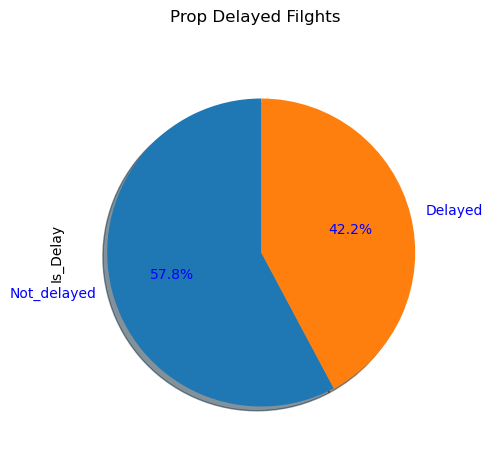

In [9]:
# Create a column, name [is_delay] = 'True' when departure delay > 0, else False.
flights_2007['Is_Delay'] = (flights_2007['DepDelay'] > 0).astype('int32')
labels = 'Not_delayed', 'Delayed'

# Plot pie chart % delayed flights compared to total flights
flights_2007['Is_Delay'].value_counts().plot.pie(subplots = True, labels = labels, figsize = (5, 5), title = 'Prop Delayed Filghts', textprops = {'color':"b"}, autopct = '%1.1f%%', shadow = True, startangle = 90)

Conclusion: Around 42% delayed flights in 2007, which was a huge percentage. 
Therefore, more focus on delayed flights and its factors are looked-into in this project

### Question 2: Percentage cancelled flights

array([<Axes: ylabel='Cancelled'>], dtype=object)

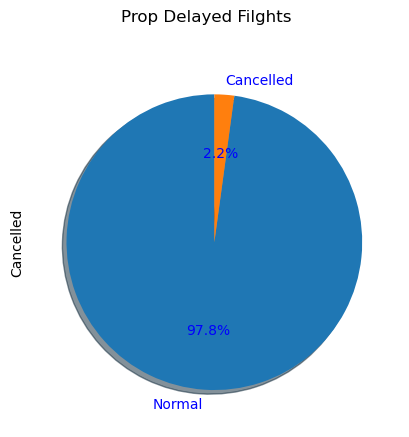

In [10]:
# Percentage of cancelled flights compared to total flights
labels = 'Normal', 'Cancelled'
flights_2007['Cancelled'].value_counts().plot.pie(subplots = True, labels = labels, title = 'Prop Delayed Filghts', textprops = {'color':"b"}, autopct = '%1.1f%%', shadow = True, startangle = 90)

Conclusion: Slightly only 2% of cancelled flights in 2007

### Question 3: Percentage cancelled flights in total delayed flights

In [11]:
# Selecting delayed flights, and focus on analysis of on-time performance
flights_dep_delay=flights_2007[flights_2007['DepDelay'] > 0]

# Count the number of cancelled flights (Cancelled = 1)
total_cancelled_in_delayed_flights = len(flights_dep_delay[flights_dep_delay.Cancelled == 1])

# Count the total of delayed flights
total_delayed_flights = flights_dep_delay.shape[0]

prop_cancelled_in_delayed_flights = total_cancelled_in_delayed_flights/total_delayed_flights
prop_cancelled_in_delayed_flights

0.0

Conclusion: There is 0 cancelled flights in delayed flights, which means delayed flights will not resulted in being cancelled.

### Question 4: Arrival Delay

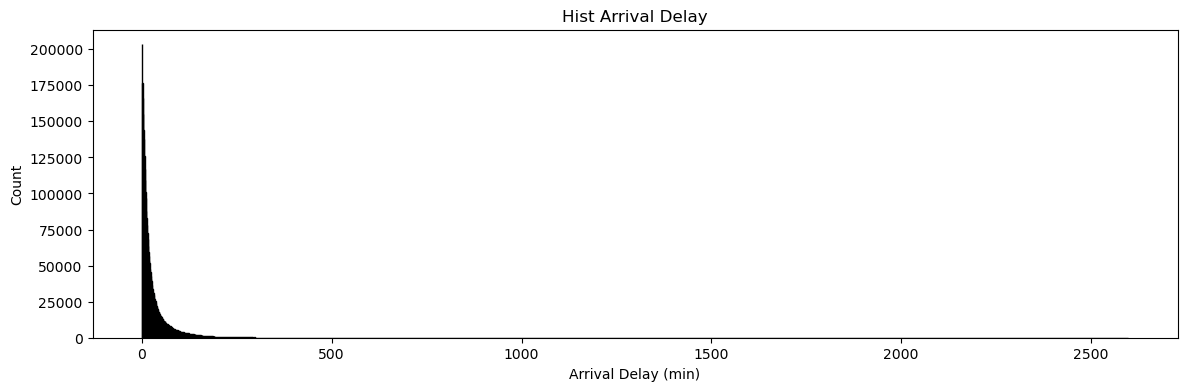

In [52]:
binsize = 1
bins = np.arange(0, flights_2007['ArrDelay'].max() + binsize, binsize)
plt.figure(figsize=[14,4])
plt.hist(data = flights_2007, x = 'ArrDelay', bins = bins, edgecolor= 'black')
chart_labels('Arrival Delay (min)' , 'Count', 'Hist Arrival Delay')

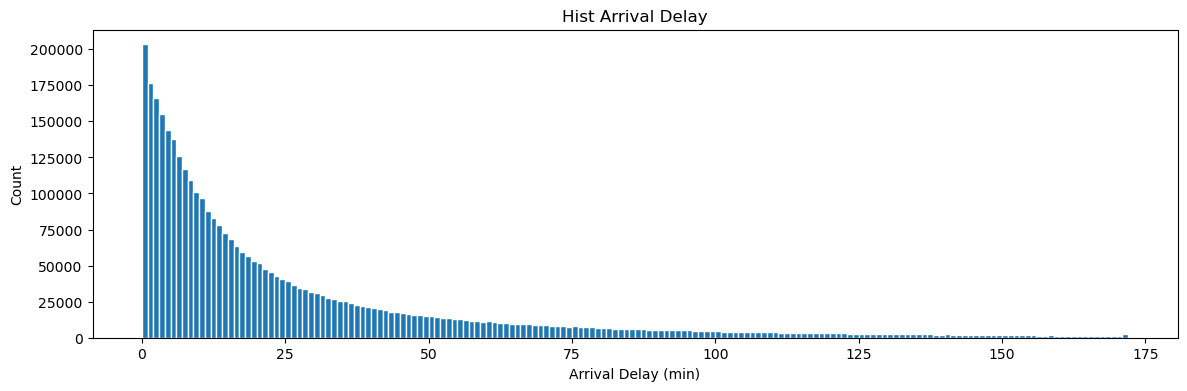

In [53]:
binsize = 1
bins = np.arange(0, flights_2007['ArrDelay'].quantile(0.99) + binsize, binsize)
plt.figure(figsize=[14,4])
plt.hist(data = flights_2007, x = 'ArrDelay', bins = bins, edgecolor= 'white')
chart_labels('Arrival Delay (min)' , 'Count', 'Hist Arrival Delay')

Conclusion: The highest range of delay in arrival at the airports is between 10 - 30 minutes

### Question 5: Departure Delay

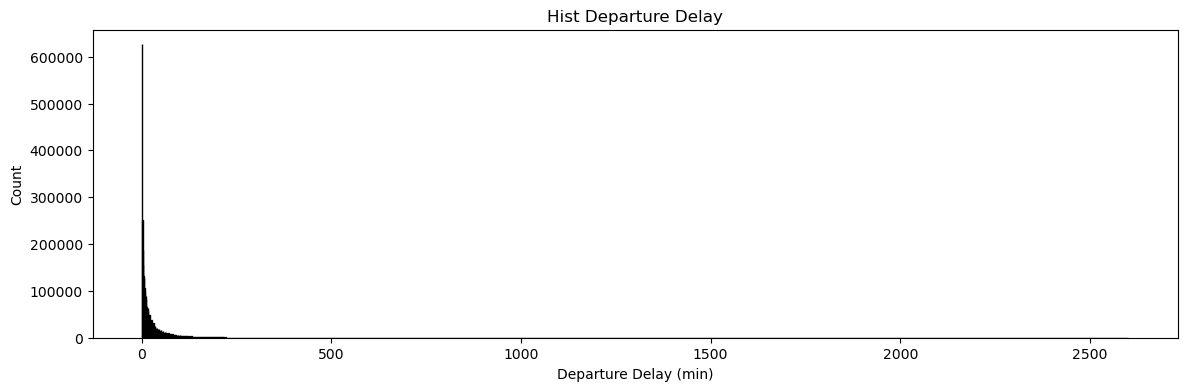

In [54]:
binsize = 1
bins = np.arange(0, flights_2007['DepDelay'].max() + binsize, binsize)
plt.figure(figsize=[14,4])
plt.hist(data = flights_2007, x = 'DepDelay', bins = bins, edgecolor= 'black')
chart_labels('Departure Delay (min)' , 'Count', 'Hist Departure Delay')

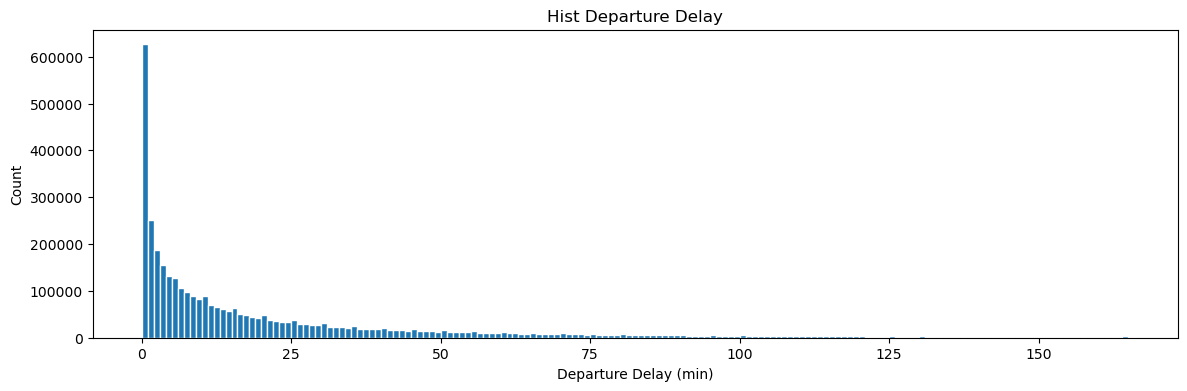

In [55]:
binsize = 1
bins = np.arange(0, flights_2007['DepDelay'].quantile(0.99) + binsize, binsize)
plt.figure(figsize=[14,4])
plt.hist(data = flights_2007, x = 'DepDelay', bins = bins, edgecolor= 'white')
chart_labels('Departure Delay (min)' , 'Count', 'Hist Departure Delay')

Conclusion: The highest range of delay in departure at the airports is also between 10 - 30 minutes

### Question 6: Which month has the most delayed flights?

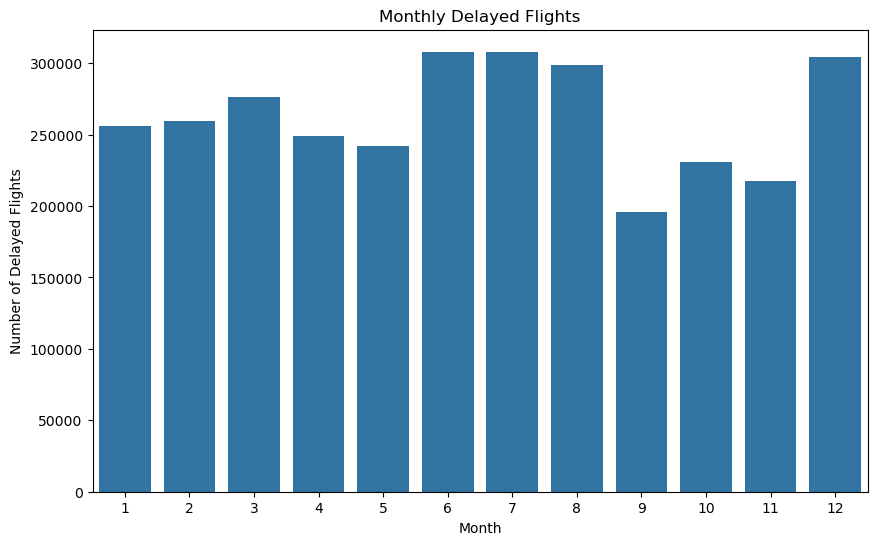

In [14]:
# Count the number of Month based on delayed flights
plt.figure(figsize = [10, 6])
sb.countplot(data = flights_dep_delay, x = 'Month', color = base_color)
chart_labels('Month', 'Number of Delayed Flights', 'Monthly Delayed Flights')

Conclusion: The Month of June, July, August (Summer Holiday) and December (Christmas and New Year Holiday) are the months which had the most delayed flights.

### Question 7: Which day of week had the most delayed flights?

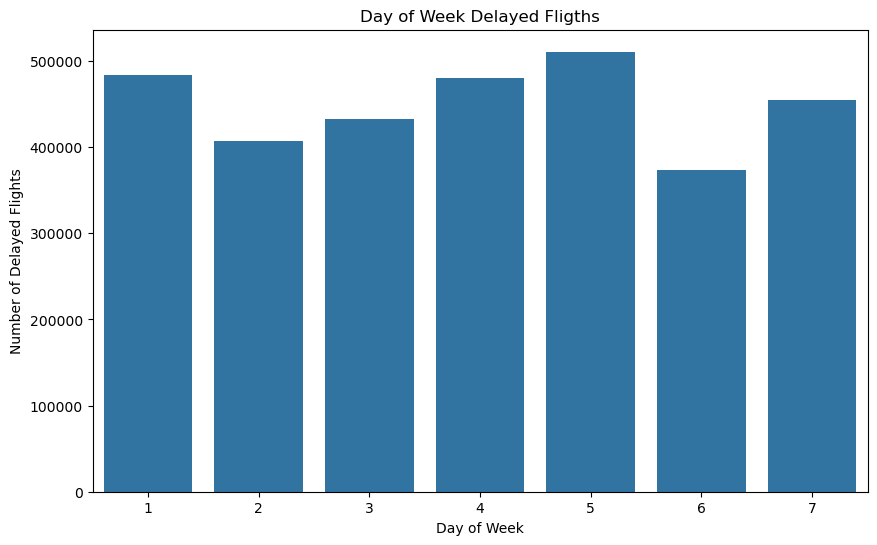

In [15]:
# Count Day of Week based on delayed flights
plt.figure(figsize = [10, 6])
sb.countplot(data = flights_dep_delay, x = 'DayOfWeek', color = base_color)
chart_labels('Day of Week', 'Number of Delayed Flights', 'Day of Week Delayed Fligths')

Conclusion: Starting from Monday is number 1, the highest column presents that Friday (number 5) has the most delayed due to weekend.

### Question 8: Which airlines had the most delayed flights?

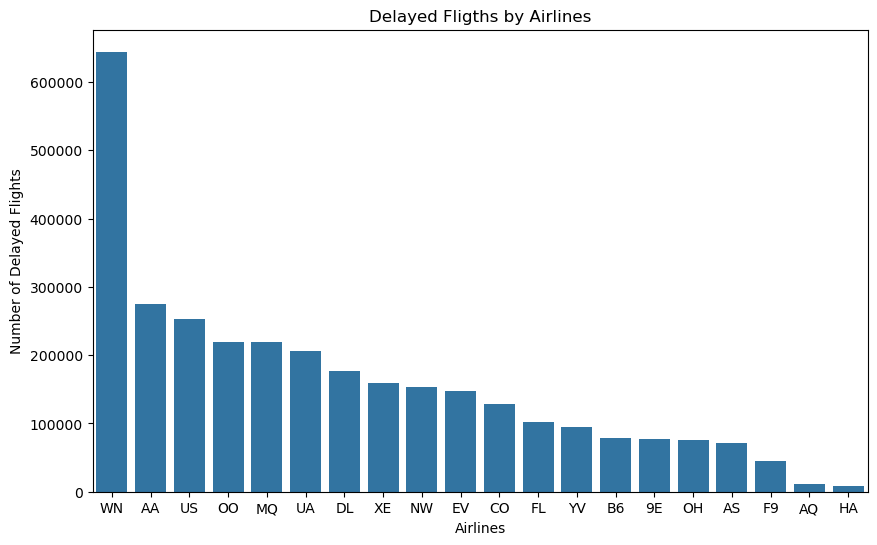

In [16]:
# Count Day of Week based on delayed flights
plt.figure(figsize = [10, 6])
order_airline = flights_dep_delay['UniqueCarrier'].value_counts().index
sb.countplot(data = flights_dep_delay, x = 'UniqueCarrier', color = base_color, order = order_airline)
chart_labels('Airlines', 'Number of Delayed Flights', 'Delayed Fligths by Airlines')

Conclusion: Airlines code 'WN' is the most delayed airlines, and astonishingly... the numbers of delayed flights of this airlines is twice more than other airlines in comparison.

### Question 9: Which cancellation code is the most?

[Text(0, 0, 'Carrier'),
 Text(1, 0, 'Weather'),
 Text(2, 0, 'National Air System'),
 Text(3, 0, 'Security')]

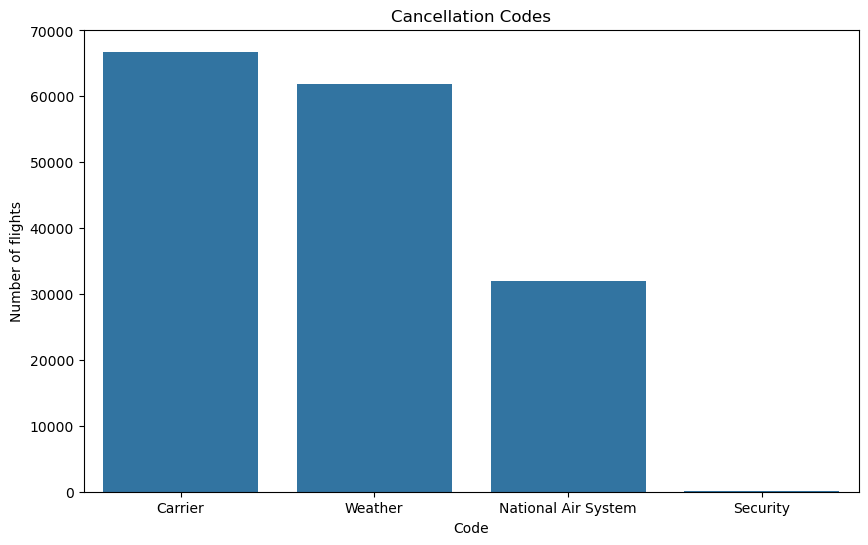

In [17]:
plt.figure(figsize = [10, 6])
g = sb.countplot(data = flights_2007, x = 'CancellationCode', color = base_color, order=['A','B','C','D'])
chart_labels('Code', 'Number of flights', 'Cancellation Codes')
g.set_xticklabels(['Carrier', 'Weather', 'National Air System', 'Security'])

Conclusion: Surprisingly, Carrier is even higher than Weather as reason for cancellation. As my perspective, the most cancellation reason usually be weather issue (e.g: storm, heavy rain)

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> There are some outliers in arrival delay and departure delay, so I have to use a log scale when doing plots.



### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Departure delay (min) shows that the total gap time between actual departure and scheduled departure, but DepDelay have negative values (values < 0), so I create sub dateframe to get only flights that DepDelay > 0 for analysis

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in flights. In addition, we will combine to plane data to get more information

### Question 10: Correlation between Departure Delay and Arrival Delay

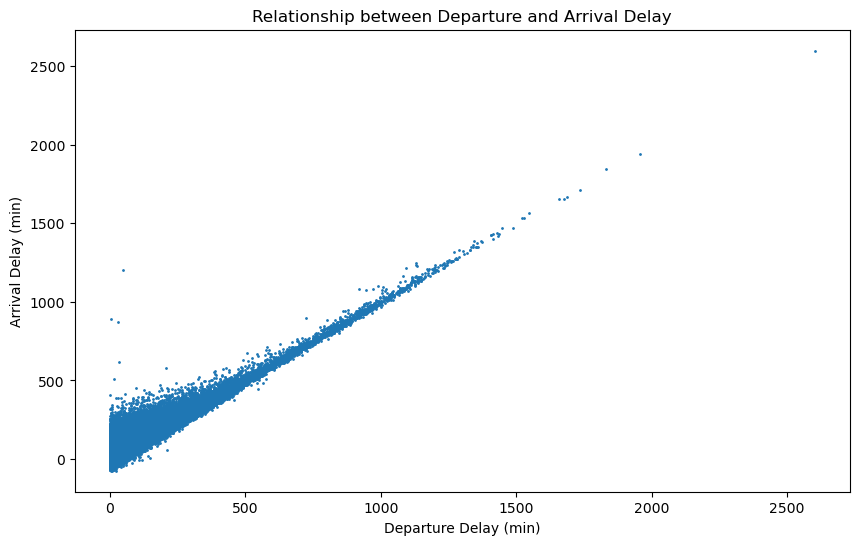

In [57]:
plt.figure(figsize = [10, 6])
plt.scatter(data = flights_dep_delay, x = 'DepDelay', y = 'ArrDelay', s = 1)
chart_labels('Departure Delay (min)', 'Arrival Delay (min)', 'Relationship between Departure and Arrival Delay')

Conclusion: There is dynamically correlation between departure and arrival delay.

### Question 11: Which airports had the highest delays at departure?

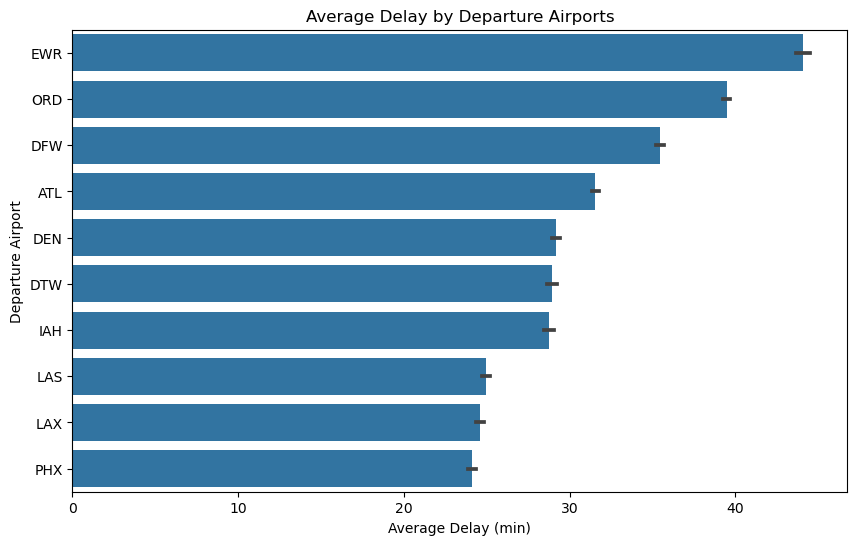

In [19]:
# Select top 10 delayed departure airports in the total of delayed flights.
top10_delayed_airports = flights_dep_delay.Origin.value_counts().nlargest(10).index.tolist()

# Create a df containing flights in the list of top 20 delayed departure airports
flights_top10_delayed_airports = flights_dep_delay[flights_dep_delay.Origin.isin(top10_delayed_airports)]

#Create order to easy find out which is the departure airport had the most delay
order_top10 = flights_top10_delayed_airports.groupby(['Origin']).DepDelay.mean().sort_values(ascending=False).index

# Barplot
plt.figure(figsize = [10, 6])
sb.barplot(data = flights_top10_delayed_airports, y = 'Origin', x = 'DepDelay', color = base_color, order = order_top10)
chart_labels('Average Delay (min)', 'Departure Airport', 'Average Delay by Departure Airports' )

Conclusion: Top 3 departure airports that had high average delay minutes is EWR, ORD, and DFW. 

### Question 12: Which aircrafts manufacturer has the highest delay?

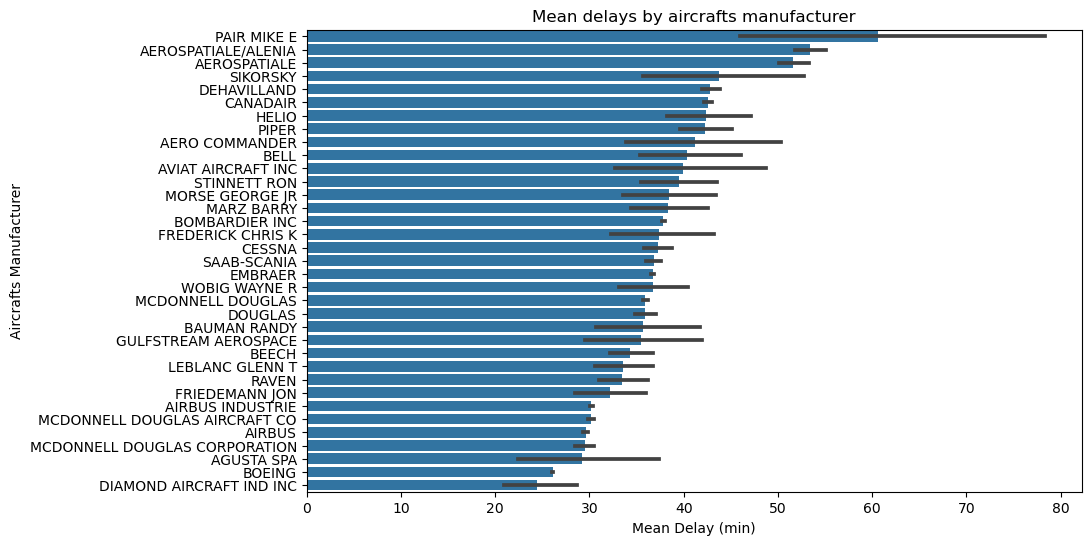

In [20]:
# Rename column primary key on plane-data before join to flights, TailNum is aircraft code
plane_data = plane_data.rename(columns = {"tailnum": "TailNum"})

# Join flights dep delay to plane data to get detail information about aircraft
flights_plane_delay = pd.merge(flights_dep_delay, plane_data, on = ['TailNum'], how = 'left')

# Create order to easy find out which is the aircraft manufacturer had the most delay
order_manu = flights_plane_delay.groupby(['manufacturer']).DepDelay.mean().sort_values(ascending = False).index

# Plot
plt.figure(figsize = [10, 6])
sb.barplot(data = flights_plane_delay, y = 'manufacturer', x = 'DepDelay', color = base_color, order = order_manu)
chart_labels('Mean Delay (min)', 'Aircrafts Manufacturer', 'Mean delays by aircrafts manufacturer')

Conclusion: Top 3 manufacturer that has high average delay minutes is PAIR MIKE E, AEROSPATIALE and SIKORSKY. The most attention is BOEING and AIRBUS (top aircrafts manufacturer of the world) sure consume a low average delay per minutes. Therefore, manufacturer does impact the delay by technical issues

### Question 13: Is Taxi Out effect to Departure Delay?

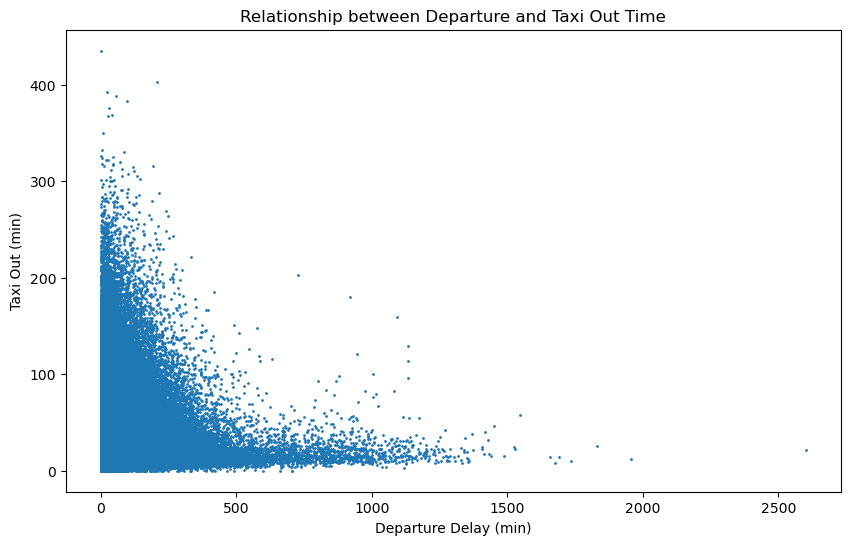

In [56]:
plt.figure(figsize = [10, 6])
plt.scatter(data = flights_dep_delay, x = 'DepDelay', y = 'TaxiOut', s = 1)
chart_labels('Departure Delay (min)', 'Taxi Out (min)', 'Relationship between Departure and Taxi Out Time')

Conclusion: Taxi-out time is the metrics when time spent by a flight between the actual off-block time (AOBT) and actual take-off time (ATOT). The plot demonstrates these varibles with no correlation as a result

### Question 14: Which month has more delayed flights?

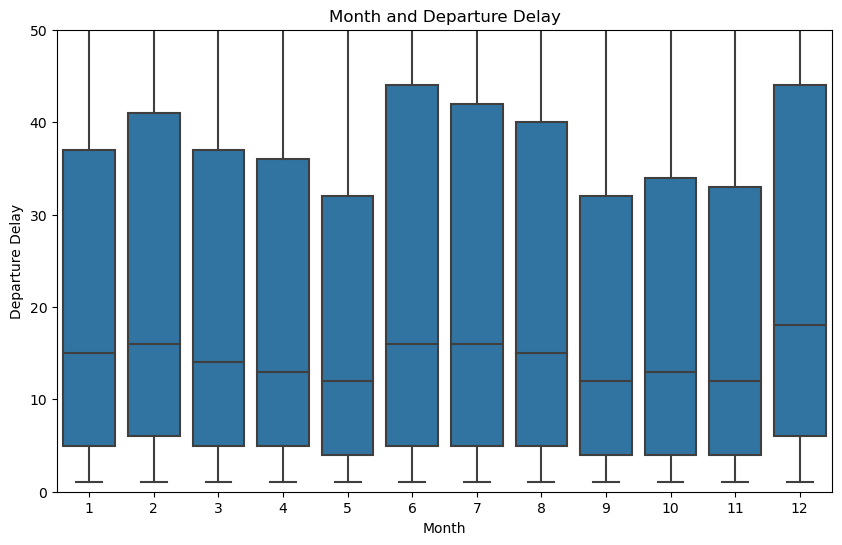

In [22]:
plt.figure(figsize = [10, 6])
sb.boxplot(data = flights_dep_delay, x = 'Month', y=  'DepDelay', color = base_color)
plt.ylim(0,50)
chart_labels('Month', 'Departure Delay', 'Month and Departure Delay')

Conclusion: As the graph, month does not effect delayed flights

### Question 15: Is Distance of flights effect to Departure Delay?

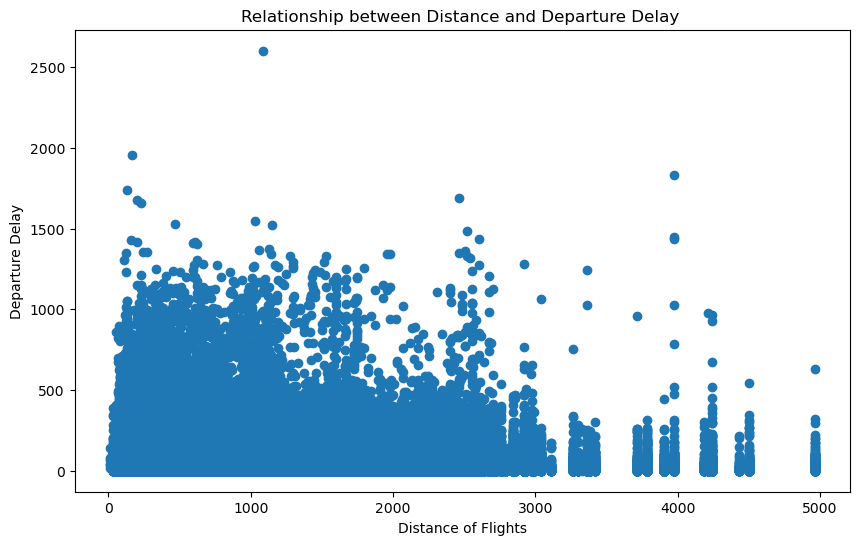

In [23]:
plt.figure(figsize = [10, 6])
plt.scatter(data = flights_dep_delay, x = 'Distance', y = 'DepDelay')
chart_labels('Distance of Flights', 'Departure Delay', 'Relationship between Distance and Departure Delay ')

Conclusion: As the graph, distance do not effect delayed flights

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> There is a strong correlation between departure and arrival delay minutes. Also, aircraft manufacturers and airports somehow have an impact to delayed flights. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The interesting part should come from the Airlines plot, The airline code "WN" belongs to Southwest Airlines. Southwest Airlines is a major low-cost airline based in the United States and cannot believe that this airline has the largest amount of delay flights compare to a lot more airlines.

### Question 16: Which Manufacturer has the highest delayed flights by each month in 2007?

In [34]:
# Count the Manufacturer
flights_plane_delay['manufacturer'].value_counts().head()

BOEING               1266160
EMBRAER               416636
BOMBARDIER INC        411043
AIRBUS INDUSTRIE      253775
MCDONNELL DOUGLAS     142420
Name: manufacturer, dtype: int64

In [42]:
# Check for top 10 manufacturers
top6 = flights_plane_delay['manufacturer'].value_counts()[:5].index
top6

Index(['BOEING', 'EMBRAER', 'BOMBARDIER INC', 'AIRBUS INDUSTRIE',
       'MCDONNELL DOUGLAS'],
      dtype='object')

In [43]:
# Select top 5 manufacturer
top5_manufacturer = flights_plane_delay.query('manufacturer in @top6').copy()

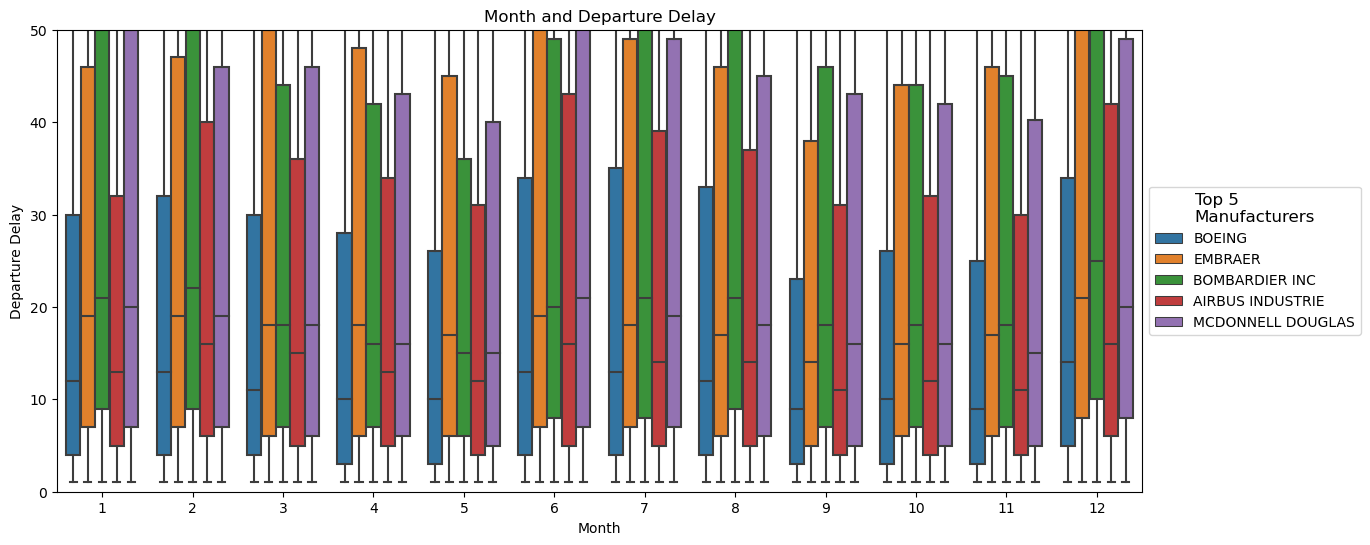

In [44]:
plt.figure(figsize = [14, 6])
sb.boxplot(data = top5_manufacturer, x = 'Month', y = 'DepDelay', hue = 'manufacturer')
plt.ylim(0,50)
chart_labels('Month', 'Departure Delay', 'Month and Departure Delay')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
           title="Top 5\nManufacturers", title_fontsize = 12);

Conclusion: Top 3 among 5 manufacturers that has high delay per month are BOMBARDIER, EMBRAER and MCDONNELL DOUGLAS.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> A deep-dive analysis of delayed manufacturer for flights by month, it was spotted that some manufacturer can cause immense delays.

### Were there any interesting or surprising interactions between features?

> In Summer months and Christmas/New Year events were the main reason on why flights are delayed whether under any criteria .

## Conclusions
> - Regarding the scope 'On-time performance', we look directly to delayed flights. Departure airports, Airlines and aircraft manufacturer are the factors which have the most impact to the delays.
> - Late aircraft and airlines are the top reasons causing delayed flights.
> - Delayed flights happened in Summer and Christmas/New Year, which is understandable since these are busy season for aviation industry in general.